# Lead Scoring Case Study

## Importing Libraries 

In [1]:
pwd

'/Users/yashluharuka/Downloads/Lead scoring case study/Lead scoring case study'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score  

from math import sqrt

In [3]:
e_df1=pd.read_csv('Leads.csv',encoding='utf-8',engine='python')

In [4]:
e_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
e_df1.shape

(9240, 37)

In [6]:
e_df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
e_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Among the 37 columns 7  are numerical and remaining 30 are categorical variables.

In [8]:
e_df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


According to the table above, varible columns such as 'totalVisits','Total Time Spent on Website' and 'Page Views Per Visit' have outliers
Through observation of the 2 tables it can be deduced that there is missing values and redundant columns. Therefore the following steps will rectify the same.

## Data Cleaning 

In [9]:
# Dropping redundant columns

redundant_col=['A free copy of Mastering The Interview','Lead Number','I agree to pay the amount through cheque', 'Prospect ID', 'Country','City']

e_df=e_df1.drop(redundant_col,1)

In [10]:
e_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


According to the table above, Select label indicates that poetential customer has not selected any option, therefore convert it to null-value as it indicates no suitable factor for customer search. 

#### Find 'Select' label columns and categories 

In [11]:
# loop creation and columns appended to a new list

col=list(e_df.columns)
test=['Select']
unselect=[]
for i in range(len(col)):
    if len(e_df[col[i]].isin(test).unique())>1:
        unselect.append(col[i])
# column with label 'Select'
unselect 

['Specialization', 'How did you hear about X Education', 'Lead Profile']

Select label colums are 'Specialization', 'How did you hear about X Education', 'Lead Profile'.

In [12]:
# Now replacing label 'Select' with nan values

# Copying the required columns in sepearate DataFrame

dataframe_1=pd.DataFrame(e_df['Specialization'])
dataframe_2=pd.DataFrame(e_df['How did you hear about X Education'])
dataframe_3=pd.DataFrame(e_df['Lead Profile'])

In [13]:
# Replacing 'Select' label with nan values

dataframe_1=dataframe_1.replace('Select',np.NaN)
dataframe_2=dataframe_2.replace('Select',np.NaN)
dataframe_3=dataframe_3.replace('Select',np.NaN)

In [14]:
# After replacing in temporary dataframe, we update our original dataset with new set of data from dataset dataframe_1

e_df['Specialization']=dataframe_1['Specialization']
e_df['How did you hear about X Education']=dataframe_2['How did you hear about X Education']
e_df['Lead Profile']=dataframe_3['Lead Profile']

Now, we have replaced the label 'Select' with null values

In [15]:
# Check for missing values

round(e_df.isnull().sum()/len(e_df)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Columns with more than 30% of missing value to be dropped as it is difficult

In [16]:
# Droping Columns more than 30% 

drop_col=e_df.isnull().sum()
drop_col=drop_col[drop_col.values/len(e_df)>0.30]
len(drop_col)

9

In [17]:
# Drop 9 columns 

d_c=list(drop_col.keys())
e_df=e_df.drop(d_c,1)  
round(e_df.isnull().sum()/len(e_df)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

The 9 columns are removed 
Columns with less than 30% of missing values - impute it

In [18]:
# Let's start with first columns of missing values
e_df['Lead Source'].value_counts().head(5)   

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

Google with occurences high number of occurences, therefore impute them

In [19]:
e_df['TotalVisits'].value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

0.0 with occurences high number of occurences, therefore impute them

In [20]:
e_df['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

0.0 with occurences high number of occurences, therefore impute them

In [21]:
e_df['Last Activity'].value_counts().head(5)

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

Email Opened with occurences high number of occurences, therefore impute them

In [22]:
e_df['What is your current occupation'].value_counts().head(5)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

Unemployed with occurences high number of occurences, therefore impute them

In [23]:
e_df['What matters most to you in choosing a course'].value_counts().head(5)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Better Carrer Prospect with occurences high number of occurences, therefore impute them

In [24]:
# Impute values
miss_val={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

e_df=e_df.fillna(value=miss_val)

In [25]:
# check for missing value
e_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

In [26]:
e_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

According to the above column 'Lead Source' containing label name 'google' with different format therefore we need to make it same

In [27]:
# Apply command lambda to captilize

e_df['Lead Source']=e_df['Lead Source'].apply(lambda x:x.capitalize())

e_df['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: Lead Source, dtype: int64

## EDA

### Data Transformation

Assign numerical variables to categories 

In [28]:
# Yes : 1 , No : 0

category={"No":0,"Yes":1}    # creating dictionary for two categories

# Column 'Receive More Updates About Our Courses'

e_df['Receive More Updates About Our Courses']=e_df['Receive More Updates About Our Courses'].map(category)

# Column 'Do Not Email'

e_df['Do Not Email']=e_df['Do Not Email'].map(category)

# Column 'Get updates on DM Content'

e_df['Get updates on DM Content']=e_df['Get updates on DM Content'].map(category)

# Column 'Magazine'

e_df['Magazine']=e_df['Magazine'].map(category)

# Column 'X Education Forums'

e_df['X Education Forums']=e_df['X Education Forums'].map(category)

# Column 'Newspaper Article'

e_df['Newspaper Article']=e_df['Newspaper Article'].map(category)

# Column 'Newspaper'

e_df['Newspaper']=e_df['Newspaper'].map(category)

# Column 'Search'

e_df['Search']=e_df['Search'].map(category)

# Column 'Digital Advertisement'

e_df['Digital Advertisement']=e_df['Digital Advertisement'].map(category)

# Column 'Do Not Call'

e_df['Do Not Call']=e_df['Do Not Call'].map(category)

# Column 'Through Recommendations'

e_df['Through Recommendations']=e_df['Through Recommendations'].map(category)

# Column 'Update me on Supply Chain Content'

e_df['Update me on Supply Chain Content']=e_df['Update me on Supply Chain Content'].map(category)

After conversion of binary categories from 'Yes' to 1 and 'No' to 0,  dummy variables need to be created 

In [29]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [30]:
# Creating a dummy variables for 8 categories and dropping the first level.

dummy=pd.get_dummies(e_df[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

# Adding these dummies to our original dataset

e_df=pd.concat([e_df,dummy],axis=1)

e_df.shape

(9240, 83)

Removal of repeated and duplicate columns 

In [31]:
# Creation of dummies for below categories, therefore removal of main column 

dup_col=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


e_df=e_df.drop(dup_col,1)

e_df.shape

(9240, 77)

In [32]:
# Redundant variables to be dropped

redu=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

e_df=e_df.drop(redu,1)

In [33]:
# As dataset consist of imported as an 'Object' conversion of categorical to numerical

e_df[['TotalVisits','Page Views Per Visit']]=e_df[['TotalVisits','Page Views Per Visit']]._convert(numeric=True)


In [34]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

### Outlier Check

In [35]:
round(e_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


2 variables are outliers 'TotalVisits' and 'Page Views Per Visit'. Therefore, visualisation is required to understand through plot

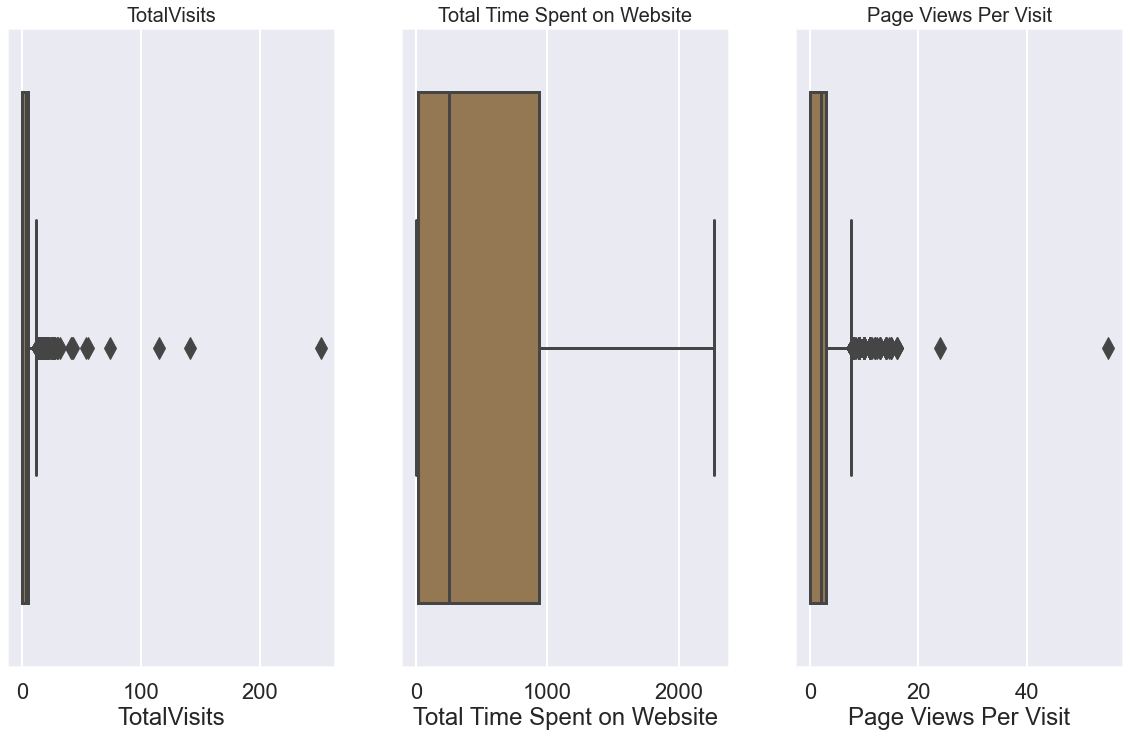

In [36]:
# # Visualize the outliers with boxplot for all the variables 
plt.figure(figsize=(20,40))
plt.tight_layout()
sns.set_style('darkgrid')
sns.set_context('poster')
columns={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}
for l in range(3):
    plt.subplot(3,3,l+1)
    plt.title(columns[l],fontsize=20)
    sns.boxplot(x=e_df[columns[l]],data=e_df,palette='cubehelix_r',orient='h',fliersize=15) 

Creation of Bins as the two outliers 'TotalVisits' and 'Page Views Per Visit' cannot be dropped as these to can can impact

### Bin Creation

In [37]:
# Range of 'TotalVisits' variable 0 - 251 

ranges_TV={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_TV.keys()))):
    e_df[list(ranges_TV.keys())[i]]=e_df['TotalVisits'].map(lambda x: 1 if (x < list(ranges_TV.values())[i] and x >= (list(ranges_TV.values())[i] - 50)) else 0)

In [38]:
#Ranges of 'Page Views Per Visit' variable 0 - 55 

ranges_PVPV={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assign each bin with '1' or '0'

for l in range(len(list(ranges_PVPV.keys()))):
    e_df[list(ranges_PVPV.keys())[l]]=e_df['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_PVPV.values())[l] and x >= (list(ranges_PVPV.values())[l] - 10)) else 0)

Removal of  redundant columns/varaibles.

In [39]:
redu=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

e_df=e_df.drop(redu,axis=1)

e_df.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## Data Preperation

### Split

In [40]:
# Import train-test-split method model selection

from sklearn.model_selection import train_test_split

In [41]:
# Separate target varaible from dependent variable
# put target varaible 'Converted' to a new dataset 'Y'
Y=e_df['Converted']    

Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
# Put dependent variable in a new series called 'x'

x=e_df.drop('Converted',1)

x.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [43]:
# Split the data set

x_train,x_test,Y_train,Y_test=train_test_split(x, Y, train_size=0.7, test_size=0.3, random_state=100)

### Standardization

In [44]:
scaler=StandardScaler()  

In [45]:
x_train[['Total Time Spent on Website']]=scaler.fit_transform(x_train[['Total Time Spent on Website']])

x_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [46]:
## Check for conversion rate

(sum(Y)/len(Y.index))*100

38.53896103896104

Rounded conversion rate 39%

### Co-relation 

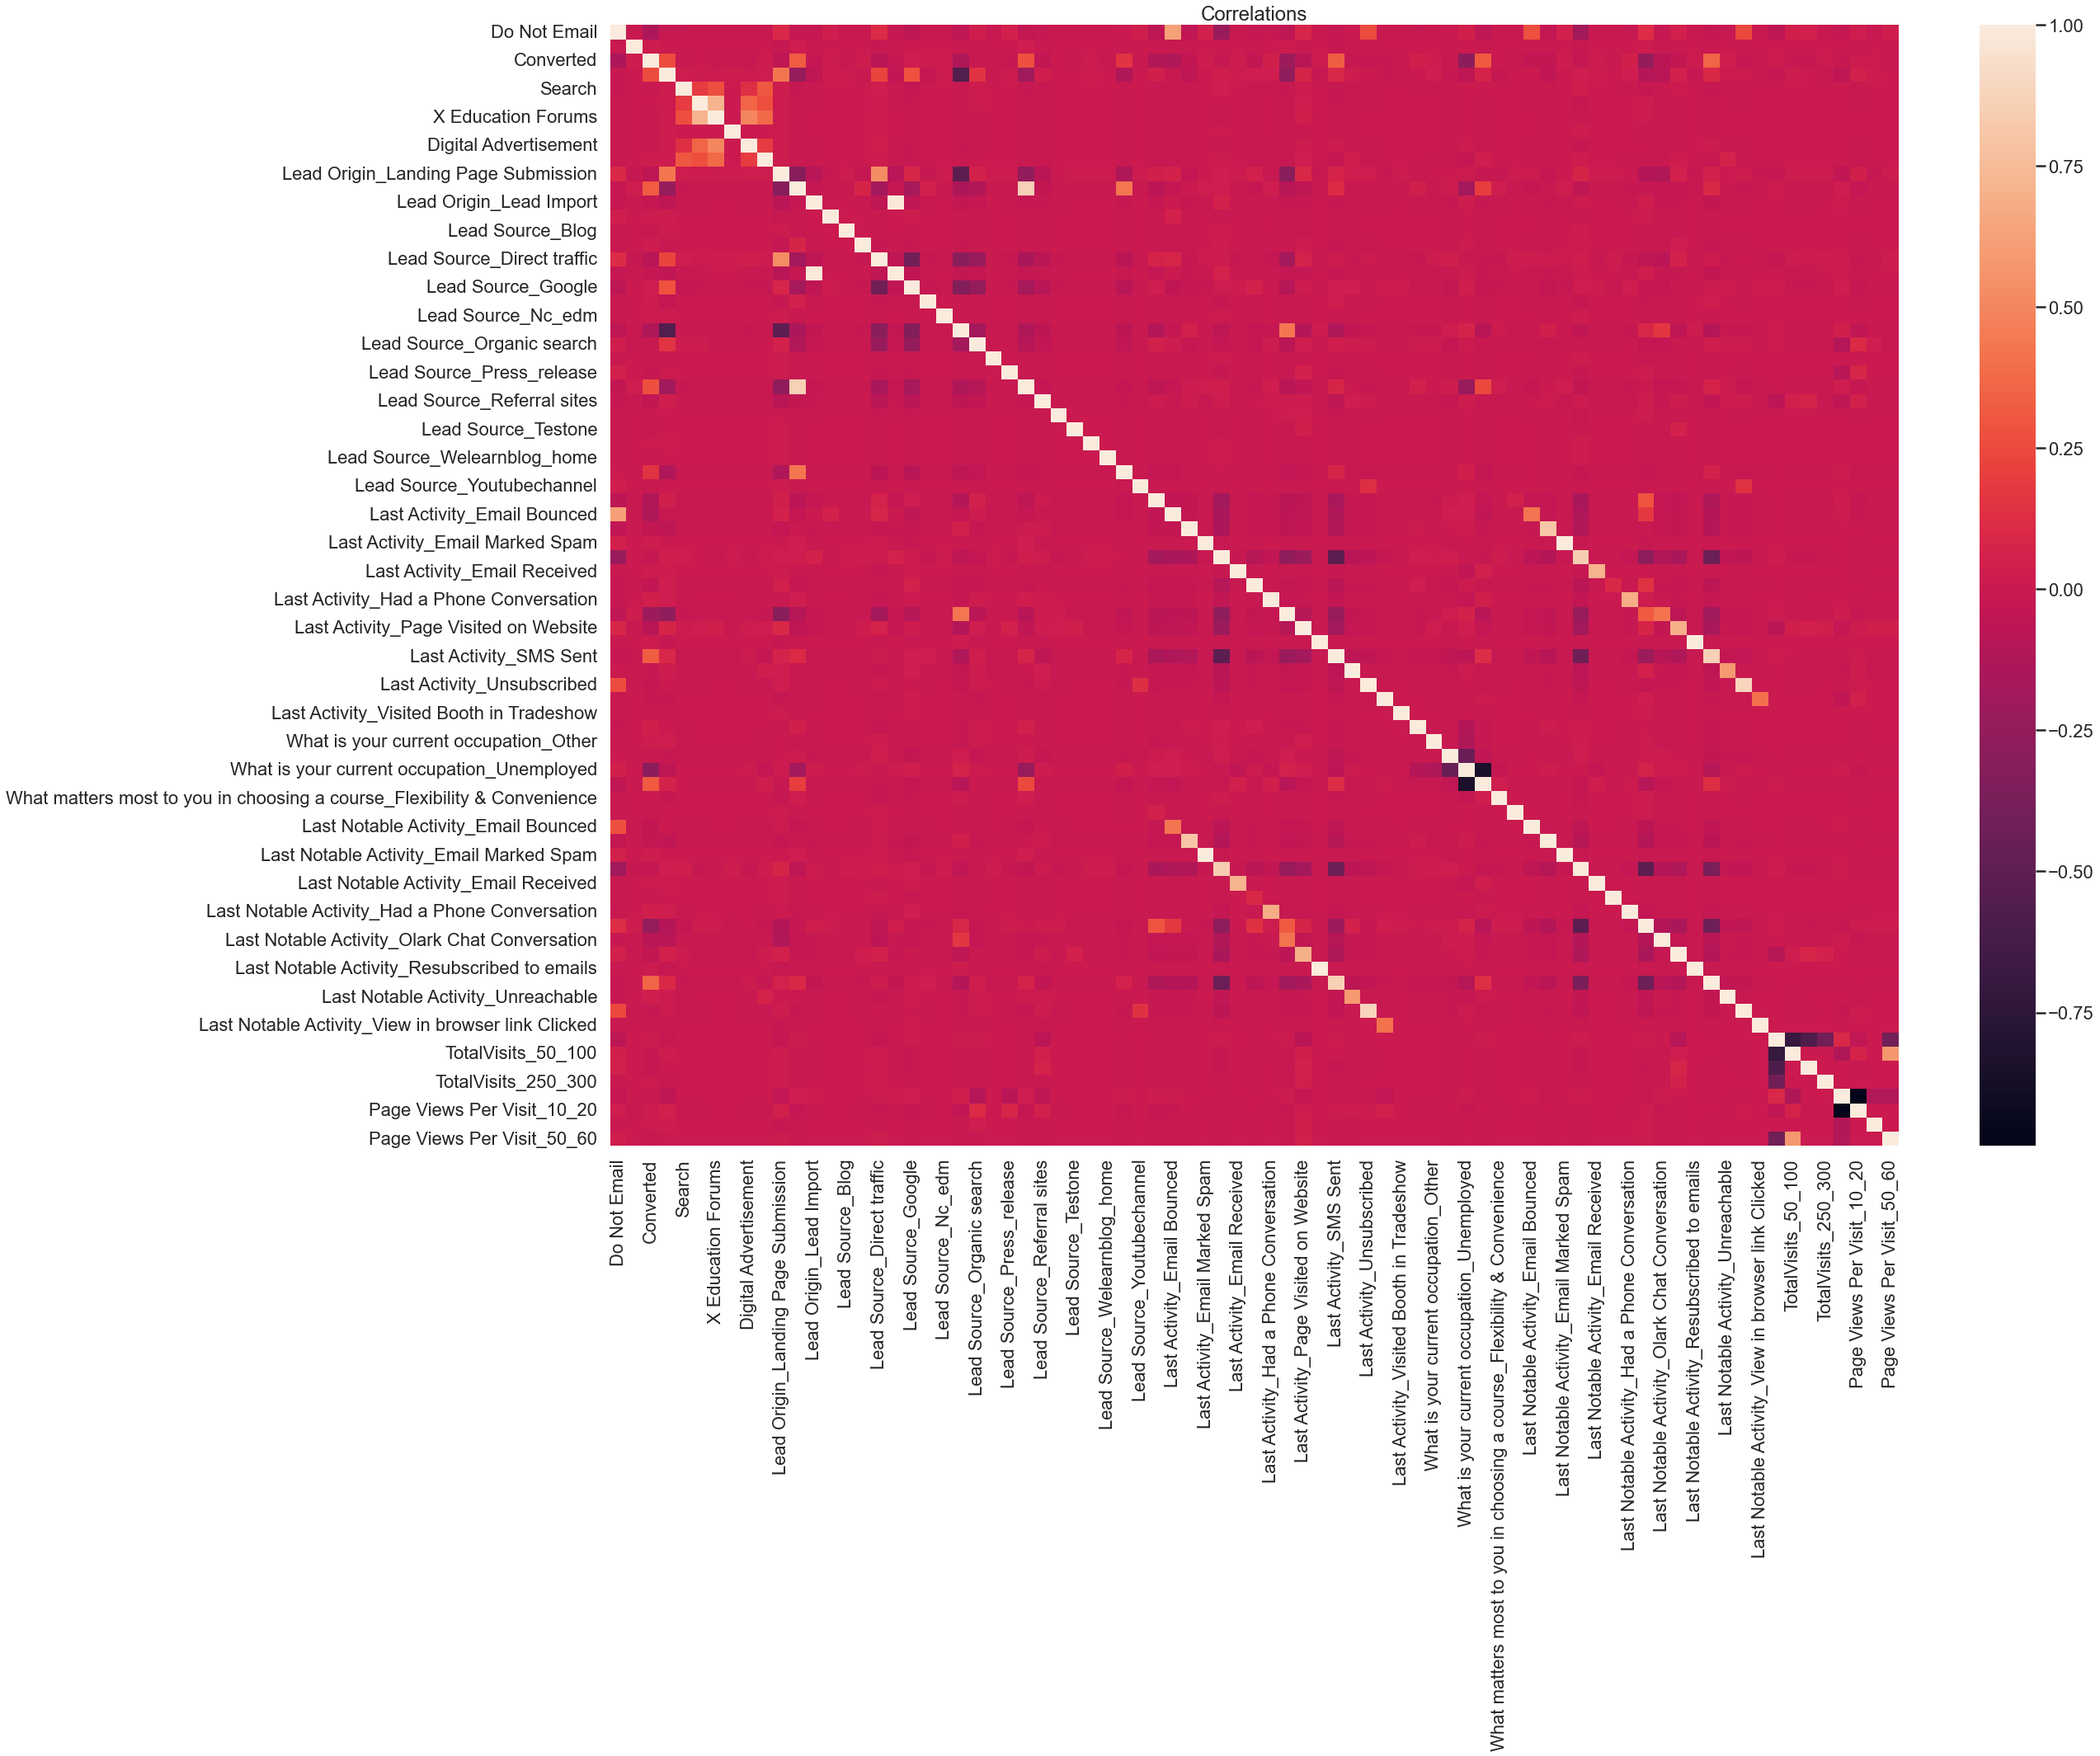

In [47]:
# Plot heatmap

plt.figure(figsize=(35,25))
plt.title('Correlations')
sns.heatmap(e_df.corr(method='spearman'))
plt.show()

According to heatmap, 2 variables are highly correlated so dropped

In [48]:
# Drop highly correlated dummy variable/categories
corr_dummy=['Lead Source_Olark chat','What is your current occupation_Unemployed']
x_train=x_train.drop(corr_dummy,1)     
x_test=x_test.drop(corr_dummy,1)       

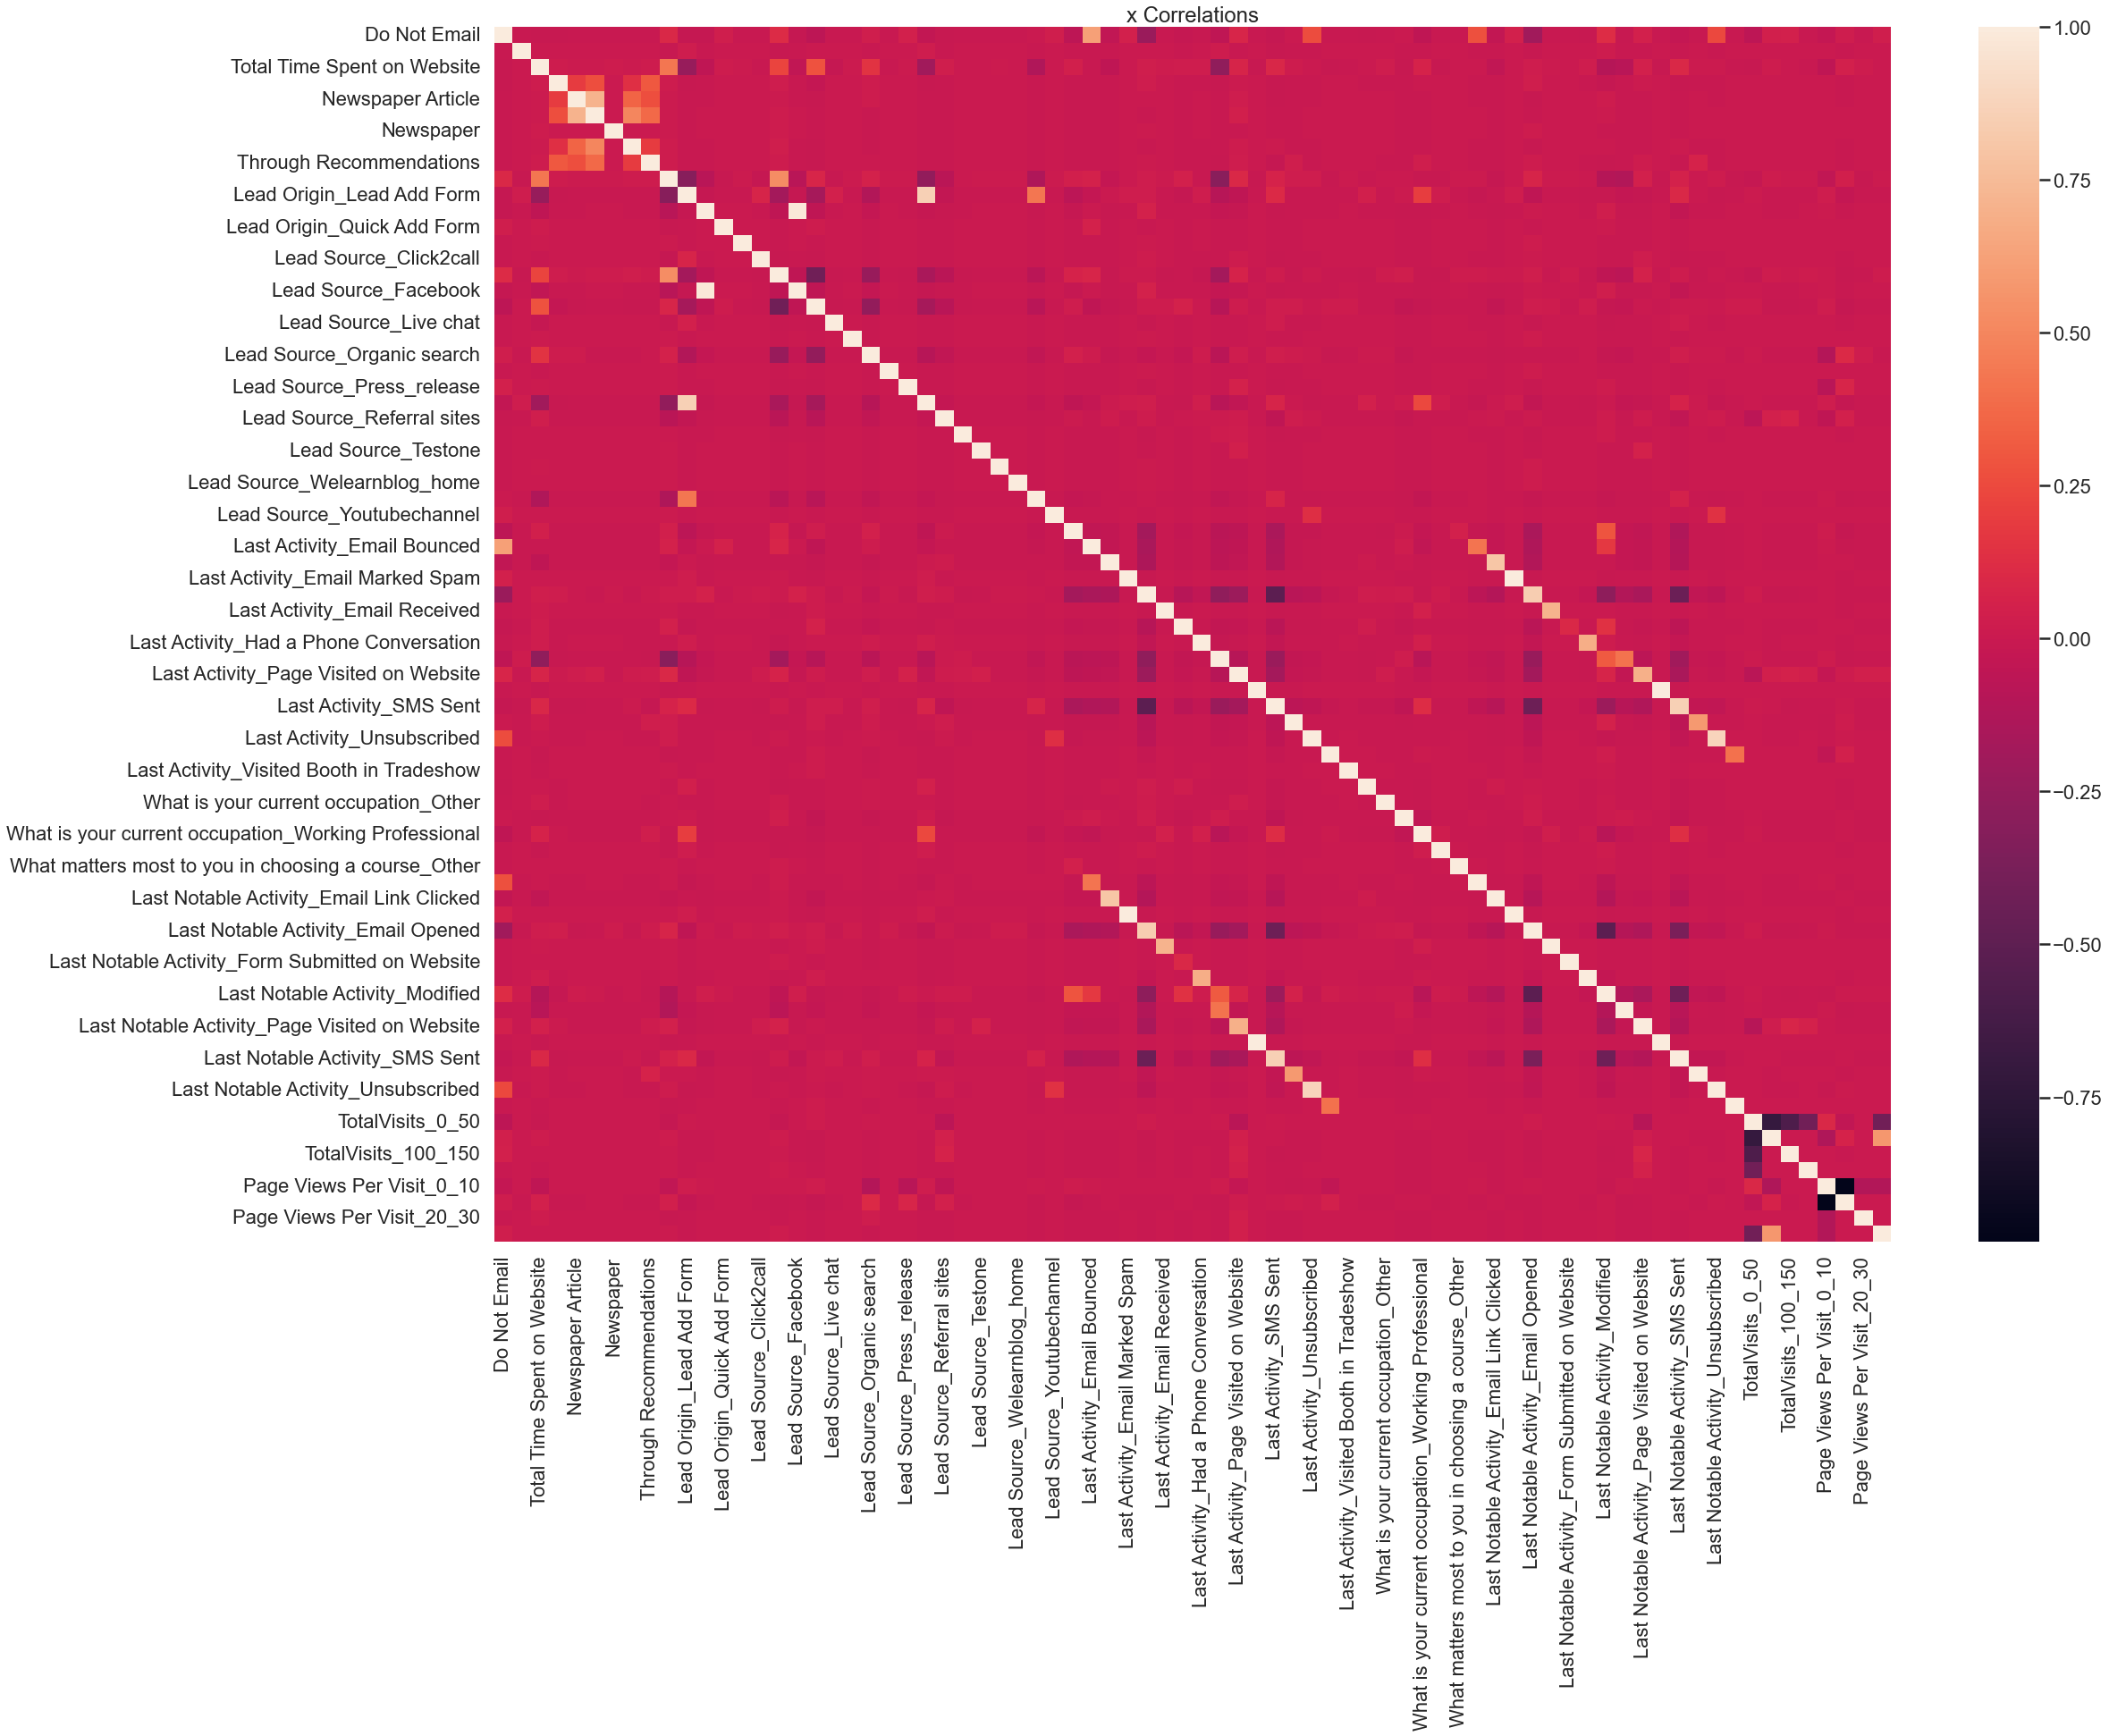

In [49]:
## Plot heatmap again to check

plt.figure(figsize=(35,25))
plt.title('x Correlations')
sns.heatmap(e_df[x_train.columns].corr(method='spearman'))
plt.show()

## Modelling

In [50]:
logis=sm.GLM(Y_train,(sm.add_constant(x_train)),familt=sm.families.Binomial())
logis.fit().summary()

/Users/yashluharuka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['familt']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Gaussian   Df Model:                           69
Link Function:               identity   Scale:                         0.13679
Method:                          IRLS   Log-Likelihood:                -2709.1
Date:                Wed, 22 Feb 2023   Deviance:                       875.18
Time:                        23:05:24   Pearson chi2:                     875.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5207
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -9.953e+10   1.28e+11     -0.780      0.435    -3.5e+11    1.51e+11
Do Not Email                                                               -0.1241      0.025     -5.062      0.000      -0.172      -0.076
Do Not Call                                                                 0.4792      0.262      1.827      0.068      -0.035       0.993
Total Time Spent on Website                                                 0.1835      0.005     35.230      0.000       0.173       0.194
Search                                                                      0.0877      0.121      0.723      0.470      -0.150       0.326
Newspaper Article                                                           0.6301      0.371      1.701      0.089      -0.096       1.356
X Education Forums                                                         -0.7018      0.611     -1.149      0.250      -1.899       0.495
Newspaper                                                                  -0.6883      0.370     -1.859      0.063      -1.414       0.037
Digital Advertisement                                                      -0.3822      0.262     -1.460      0.144      -0.895       0.131
Through Recommendations                                                     0.1413      0.157      0.898      0.369      -0.167       0.450
Lead Origin_Landing Page Submission                                        -0.0251      0.014     -1.849      0.064      -0.052       0.002
Lead Origin_Lead Add Form                                                   0.4842      0.071      6.794      0.000       0.345       0.624
Lead Origin_Lead Import                                                     0.1785      0.264      0.675      0.500      -0.340       0.697
Lead Origin_Quick Add Form                                                  0.3405      0.371      0.917      0.359      -0.387       1.068
Lead Source_Blog                                                           -0.4795      0.370     -1.295      0.195      -1.205       0.246
Lead Source_Click2call                                                     -0.1591      0.226     -0.705      0.481      -0.601       0.283
Lead Source_Direct traffic                                                 -0.1739      0.020     -8.673      0.000      -0.213      -0.135
Lead Source_Facebook                                                       -0.3494      0.265     -1.320      0.187      -0.868       0.169
Lead Source_Google                                                         -0.1202      0.017     -7.051      0.000      -0.154      -0.087
Lea

As presented through the linear model, it can deduced that there are many variables, which have an insignificant p-value. Thereofore, RFE selection of 70 variables is ineffcient 

### RFE 

In [51]:
## For 19 variables running RFE
logreg=LogisticRegression() 
rfeme = RFE(logreg,n_features_to_select=19)
rfeme = rfeme.fit(x_train,Y_train)

In [52]:
# check true/false
rfeme.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [53]:
# selection of  'True' in rfeme.support_ colums only that is True columns were selected for creating a model

col=x_train.columns[rfeme.support_]

x_train_1=sm.add_constant(x_train[col])    # Adding constant

In [54]:
# creating 1st model after RFE

logis1=sm.GLM(Y_train,x_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.1
Date:                Wed, 22 Feb 2023   Deviance:                       5358.3
Time:                        23:05:39   Pearson chi2:                 7.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3940
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1701      0.104     11.259      0.000       0.966       1.374
Do Not Email                                            -1.2346      0.193     -6.382      0.000      -1.614      -0.855
Total Time Spent on Website                              1.0853      0.039     27.645      0.000       1.008       1.162
Lead Origin_Lead Add Form                                2.7400      0.195     14.053      0.000       2.358       3.122
Lead Source_Direct traffic                              -1.2903      0.114    -11.343      0.000      -1.513      -1.067
Lead Source_Google                                      -0.9024      0.107     -8.460      0.000      -1.111      -0.693
Lead Source_Organic search                              -1.0645      0.132     -8.043      0.000      -1.324      -0.805
Lead Source_Referral sites                              -1.1262      0.312     -3.605      0.000      -1.739      -0.514
Lead Source_Welingak website                             1.8681      0.744      2.512      0.012       0.410       3.326
Last Activity_Converted to Lead                         -1.0016      0.226     -4.435      0.000      -1.444      -0.559
Last Activity_Email Bounced                             -1.0933      0.345     -3.171      0.002      -1.769      -0.418
Last Activity_Olark Chat Conversation                   -1.1949      0.193     -6.182      0.000      -1.574      -0.816
What is your current occupation_Housewife               22.8758   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.7957      0.188     14.846      0.000       2.427       3.165
Last Notable Activity_Email Link Clicked                -1.8728      0.275     -6.818      0.000      -2.411      -1.334
Last Notable Activity_Email Opened                      -1.3280      0.087    -15.274      0.000      -1.498      -1.158
Last Notable Activity_Had a Phone Conversation           2.0560      1.105      1.861      0.063      -0.110       4.222
Last Notable Activity_Modified                          -1.7097      0.099    -17.196      0.000      -1.905      -1.515
Last Notable Activity_Olark Chat Conversation           -1.4494      0.374     -3.876      0.000      -2.182      -0.717
Last Notable Activity_Page Visited on Website           -1.5749      0.192     -8.219      0.000      -1.950      -1.199
========================================================================================================================
"""

According to summary, there are high p-values, which has insignificant p-values therefore we will drop one after the other to create a new model

### VIF

In [55]:
# Creation of VIF dataframe

vif=pd.DataFrame()

vif['Features']=x_train_1[col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(x_train_1[col].values,i) for i in range(x_train_1[col].shape[1])]

# Rounding and Sorting the vif values

vif['VIF']=round(vif['VIF'],2)

vif=vif.sort_values(by='VIF',ascending=False)

vif   

,Features,VIF
16,Last Notable Activity_Modified,2.58
0,Do Not Email,1.89
10,Last Activity_Olark Chat Conversation,1.82
9,Last Activity_Email Bounced,1.80
4,Lead Source_Google,1.79
3,Lead Source_Direct traffic,1.73
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.46
17,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.30


As VIF<5, there is no multicollinearity issue in the dataset.

Dropping the highest in-significant features having 0.999 p - value -'What is Your current occupation_Housewife'.

In [56]:
# Drop'What is Your current occupation_Housewife' and constant

x_train_2=x_train_1.drop(['const','What is your current occupation_Housewife'],1)

In [57]:
# Creation of a new model

x_train_2=sm.add_constant(x_train_2)     
logis2=sm.GLM(Y_train,x_train_2,families=sm.families.Binomial()) 
reg2=logis2.fit()                                                 
reg2.summary()                                                  

/Users/yashluharuka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.13833
Method:                          IRLS   Log-Likelihood:                -2770.9
Date:                Wed, 22 Feb 2023   Deviance:                       892.07
Time:                        23:05:39   Pearson chi2:                     892.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6560      0.015     43.729      0.000       0.627       0.685
Do Not Email                                            -0.1504      0.023     -6.609      0.000      -0.195      -0.106
Total Time Spent on Website                              0.1842      0.005     35.569      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4043      0.022     18.503      0.000       0.361       0.447
Lead Source_Direct traffic                              -0.1856      0.016    -11.910      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1245      0.015     -8.360      0.000      -0.154      -0.095
Lead Source_Organic search                              -0.1509      0.018     -8.238      0.000      -0.187      -0.115
Lead Source_Referral sites                              -0.1718      0.041     -4.232      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1848      0.043      4.262      0.000       0.100       0.270
Last Activity_Converted to Lead                         -0.1096      0.024     -4.548      0.000      -0.157      -0.062
Last Activity_Email Bounced                             -0.0636      0.033     -1.953      0.051      -0.127       0.000
Last Activity_Olark Chat Conversation                   -0.1395      0.020     -6.881      0.000      -0.179      -0.100
What is your current occupation_Working Professional     0.3435      0.018     19.021      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3005      0.036     -8.447      0.000      -0.370      -0.231
Last Notable Activity_Email Opened                      -0.2243      0.013    -17.590      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2275      0.113      2.020      0.043       0.007       0.448
Last Notable Activity_Modified                          -0.2816      0.014    -20.757      0.000      -0.308      -0.255
Last Notable Activity_Olark Chat Conversation           -0.2654      0.040     -6.651      0.000      -0.344      -0.187
Last Notable Activity_Page Visited on Website           -0.2662      0.026    -10.138      0.000      -0.318      -0.215
========================================================================================================================
"""

Drop 'Last Activity_Email Bounced' is in-significant and recreate a new model

In [58]:
# Drop 'Last Activity_Email Bounced and constant

x_train_3=x_train_2.drop(['const','Last Activity_Email Bounced'],1)

In [59]:
# Recreate a new model

x_train_3=sm.add_constant(x_train_3)                                # Added constant
logis3=sm.GLM(Y_train,x_train_3,families=sm.families.Binomial())    # Used GLM, creating model
reg3=logis3.fit()                                                   # Fitted our model
reg3.summary()                                                      # Showed the model summary

/Users/yashluharuka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                         0.13839
Method:                          IRLS   Log-Likelihood:                -2772.8
Date:                Wed, 22 Feb 2023   Deviance:                       892.60
Time:                        23:05:39   Pearson chi2:                     893.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6565      0.015     43.763      0.000       0.627       0.686
Do Not Email                                            -0.1774      0.018     -9.812      0.000      -0.213      -0.142
Total Time Spent on Website                              0.1841      0.005     35.533      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4051      0.022     18.538      0.000       0.362       0.448
Lead Source_Direct traffic                              -0.1853      0.016    -11.892      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1238      0.015     -8.313      0.000      -0.153      -0.095
Lead Source_Organic search                              -0.1501      0.018     -8.191      0.000      -0.186      -0.114
Lead Source_Referral sites                              -0.1713      0.041     -4.217      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1863      0.043      4.296      0.000       0.101       0.271
Last Activity_Converted to Lead                         -0.1063      0.024     -4.423      0.000      -0.153      -0.059
Last Activity_Olark Chat Conversation                   -0.1351      0.020     -6.703      0.000      -0.175      -0.096
What is your current occupation_Working Professional     0.3437      0.018     19.031      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3013      0.036     -8.468      0.000      -0.371      -0.232
Last Notable Activity_Email Opened                      -0.2253      0.013    -17.674      0.000      -0.250      -0.200
Last Notable Activity_Had a Phone Conversation           0.2264      0.113      2.010      0.044       0.006       0.447
Last Notable Activity_Modified                          -0.2859      0.013    -21.347      0.000      -0.312      -0.260
Last Notable Activity_Olark Chat Conversation           -0.2693      0.040     -6.756      0.000      -0.347      -0.191
Last Notable Activity_Page Visited on Website           -0.2632      0.026    -10.041      0.000      -0.315      -0.212
========================================================================================================================
"""

In [60]:
# Drop Last Notable Activity_Had a Phone Conversation and constant

x_train_4=x_train_3.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [61]:
# New Model recreated

x_train_4=sm.add_constant(x_train_4)                              # Adding constant
logis4=sm.GLM(Y_train,x_train_4,families=sm.families.Binomial())  # Using GLM, creating model
reg4=logis4.fit()                                                 # Fitting our model
reg4.summary()           

/Users/yashluharuka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.13845
Method:                          IRLS   Log-Likelihood:                -2774.8
Date:                Wed, 22 Feb 2023   Deviance:                       893.15
Time:                        23:05:40   Pearson chi2:                     893.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5066
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6580      0.015     43.910      0.000       0.629       0.687
Do Not Email                                            -0.1779      0.018     -9.838      0.000      -0.213      -0.142
Total Time Spent on Website                              0.1841      0.005     35.533      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4044      0.022     18.505      0.000       0.362       0.447
Lead Source_Direct traffic                              -0.1854      0.016    -11.897      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1234      0.015     -8.287      0.000      -0.153      -0.094
Lead Source_Organic search                              -0.1502      0.018     -8.196      0.000      -0.186      -0.114
Lead Source_Referral sites                              -0.1714      0.041     -4.220      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1864      0.043      4.296      0.000       0.101       0.271
Last Activity_Converted to Lead                         -0.1065      0.024     -4.428      0.000      -0.154      -0.059
Last Activity_Olark Chat Conversation                   -0.1352      0.020     -6.706      0.000      -0.175      -0.096
What is your current occupation_Working Professional     0.3441      0.018     19.045      0.000       0.309       0.379
Last Notable Activity_Email Link Clicked                -0.3028      0.036     -8.509      0.000      -0.373      -0.233
Last Notable Activity_Email Opened                      -0.2268      0.013    -17.828      0.000      -0.252      -0.202
Last Notable Activity_Modified                          -0.2873      0.013    -21.482      0.000      -0.314      -0.261
Last Notable Activity_Olark Chat Conversation           -0.2707      0.040     -6.792      0.000      -0.349      -0.193
Last Notable Activity_Page Visited on Website           -0.2647      0.026    -10.099      0.000      -0.316      -0.213
========================================================================================================================
"""

According to table all the variables present in this model are significant as no variables is having p - value greater than 5%. Therefore there is creation VIF, all VIF vallues are less than 5 which means our final model is ready.

In [62]:
# Recheck VIF

x_train_4_1=x_train_4.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=x_train_4_1.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(x_train_4_1.values,i) for i in range(x_train_4_1.shape[1])]

# VIF values rounded

vif['VIF']=round(vif['VIF'],2)

# VIF Sorted

vif=vif.sort_values(by='VIF',ascending=False)

vif   # data set view

,Features,VIF
13,Last Notable Activity_Modified,2.50
9,Last Activity_Olark Chat Conversation,1.80
4,Lead Source_Google,1.77
12,Last Notable Activity_Email Opened,1.73
3,Lead Source_Direct traffic,1.72
2,Lead Origin_Lead Add Form,1.46
14,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.29
7,Lead Source_Welingak website,1.24
8,Last Activity_Converted to Lead,1.24


Concluded that there is no sign of multicollinearity according to the above analaysis. Therefore reg4 is final model

In [63]:
# Predict
Y_train_pred=reg4.predict(x_train_4)

# Creation of new dataset and saving predicted 

Y_train_pred_final=pd.DataFrame({'Converted':Y_train.values,'Converted_probability':Y_train_pred,'ID':Y_train.index})

Y_train_pred_final.head()   


,Converted,Converted_probability,ID
1871,0,0.268197,1871
6795,0,0.246838,6795
3516,0,0.303907,3516
8105,0,0.785984,8105
3934,0,0.207716,3934


#### ROC Curve Plotting
##### ROC highlights a tradeoff between sensitivity and specificity therefore if sensitivity increases specificity will decrease. 
##### Right side of the border is more accurate as curve closer to the left side border .
##### 45-degree diagonal of the ROC space is less accurate as the curve closer  .

In [64]:
# Creating a function to plot roc curve with auc score

def e_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

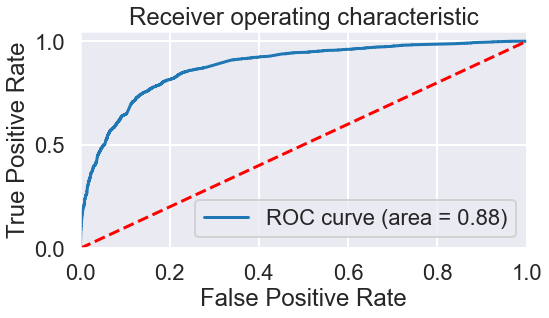

In [65]:
# Calling the roc curve for plotting

e_roc(Y_train_pred_final.Converted, Y_train_pred_final.Converted_probability)

Model is having great accuracy as curve is closer to left side of border
ROC area curve is 88% of the total area.

In [66]:
#Find optimal probability of the cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for l in numbers:
    Y_train_pred_final[l]=Y_train_pred_final['Converted_probability'].map(lambda x:1 if x > l else 0) 
Y_train_pred_final.head()   

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0


In [67]:
# Calculate accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

dataframe_cut=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(Y_train_pred_final['Converted'],Y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    dataframe_cut.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(dataframe_cut)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.431973    0.995539     0.084708
0.1          0.1  0.559833    0.974453     0.304348
0.2          0.2  0.690012    0.940795     0.535482
0.3          0.3  0.787879    0.864558     0.740630
0.4          0.4  0.809524    0.793998     0.819090
0.5          0.5  0.802257    0.646796     0.898051
0.6          0.6  0.784477    0.532036     0.940030
0.7          0.7  0.750618    0.393350     0.970765
0.8          0.8  0.718615    0.287510     0.984258
0.9          0.9  0.682127    0.173966     0.995252


Created probablity points from 0 to 0.9 for accuracy , sensitivity and specificity. 
The probability cutoff = 0.4 as all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

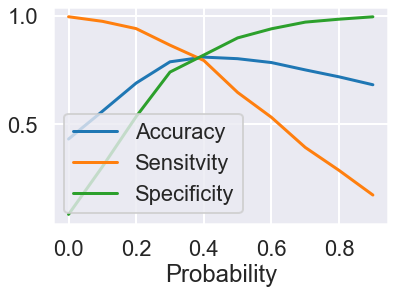

In [68]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

dataframe_cut.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()


In [69]:
# Predict the outcomes with probability cutoff as 0.4 
Y_train_pred_final['Predicted']=Y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

Y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0,0


### Precision and Recall
Creation of confusion matrix for how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned.

In [70]:
# Creating confusion matrix to find precision and recall score

conf_pr=confusion_matrix(Y_train_pred_final.Converted,Y_train_pred_final.Predicted)
conf_pr

array([[3278,  724],
       [ 508, 1958]])

In [71]:
print('Precision',conf_pr[1,1]/(conf_pr[0,1]+conf_pr[1,1]))    # Printing Pecision score
print('Recall',conf_pr[1,1]/(conf_pr[1,0]+conf_pr[1,1]))       # Printing Recall score

Precision 0.7300521998508576
Recall 0.7939983779399837


Precison percentage (Relevancy) is 73% approximately and recall percentage (Relevant results) is 79%

It will be more on Recall than Percision as recall percentage is higher, which highlights less hot lead customers but don't want to left out any hot leads which are willing to get converted 

#### Precision and Recall trade-off
Precision and Recall are inversely related that highlights if one increases other will genuinely decrease

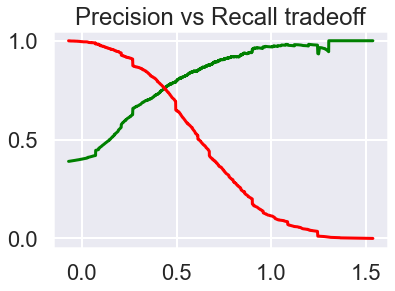

In [72]:
# Precision recall curve creation

p ,r, thresholds=precision_recall_curve(Y_train_pred_final.Converted,Y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    
plt.plot(thresholds, r[:-1], "r-")    
plt.show()

Meeting point for trade off is 0.5

### RFE Test - 2

In [73]:
# variables 15

rfeme2= RFE(logreg, n_features_to_select=15)
rfeme2= rfeme2.fit(x_train,Y_train)
rfeme2.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [74]:
# selecting columns only which are 'True' in rfeme.support_ i.e True columns were selected for creating a model

col2=x_train.columns[rfeme2.support_]

x_train_rfe2=sm.add_constant(x_train[col2])    # Adding constant

In [75]:
# creating 1st model after RFE

logis_rfe2=sm.GLM(Y_train,x_train_rfe2,family=sm.families.Binomial())

reg_rfe2=logis_rfe2.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.8
Date:                Wed, 22 Feb 2023   Deviance:                       5493.6
Time:                        23:05:56   Pearson chi2:                 6.88e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2894      0.065      4.473      0.000       0.163       0.416
Do Not Email                                            -1.3263      0.190     -6.973      0.000      -1.699      -0.954
Total Time Spent on Website                              0.9265      0.035     26.714      0.000       0.859       0.994
Lead Origin_Lead Add Form                                3.3839      0.186     18.172      0.000       3.019       3.749
Lead Source_Welingak website                             1.9606      0.743      2.638      0.008       0.504       3.417
Last Activity_Converted to Lead                         -1.1618      0.221     -5.263      0.000      -1.594      -0.729
Last Activity_Email Bounced                             -1.0321      0.336     -3.068      0.002      -1.691      -0.373
Last Activity_Olark Chat Conversation                   -0.7956      0.191     -4.168      0.000      -1.170      -0.421
What is your current occupation_Housewife               22.7265    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
What is your current occupation_Working Professional     2.7547      0.187     14.755      0.000       2.389       3.121
Last Notable Activity_Email Link Clicked                -1.7558      0.274     -6.403      0.000      -2.293      -1.218
Last Notable Activity_Email Opened                      -1.2958      0.085    -15.159      0.000      -1.463      -1.128
Last Notable Activity_Had a Phone Conversation           1.8669      1.091      1.711      0.087      -0.272       4.005
Last Notable Activity_Modified                          -1.6631      0.098    -17.055      0.000      -1.854      -1.472
Last Notable Activity_Olark Chat Conversation           -1.3184      0.370     -3.568      0.000      -2.043      -0.594
Last Notable Activity_Page Visited on Website           -1.6038      0.187     -8.582      0.000      -1.970      -1.238
========================================================================================================================
"""

According to summary, there are high p-values, which has insignificant p-values therefore we will drop one after the other to create a new model

### Calculating VIF


In [76]:
# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=x_train_rfe2[col2].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(x_train_rfe2[col2].values,i) for i in range(x_train_rfe2[col2].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif   # Viewing the dataset

,Features,VIF
12,Last Notable Activity_Modified,1.85
0,Do Not Email,1.81
5,Last Activity_Email Bounced,1.79
6,Last Activity_Olark Chat Conversation,1.78
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.24
4,Last Activity_Converted to Lead,1.23
8,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09


As VIF<5, there is no multicollinearity issue in the dataset.

Dropping the highest in-significant features having 0.999 p - value -'What is Your current occupation_Housewife'.

In [77]:
# Drop'What is your current occupation_Housewife' and constant

x_train_rfe22=x_train_rfe2.drop(['const','What is your current occupation_Housewife'],1)

In [78]:
# Creating a new model

x_train_rfe22=sm.add_constant(x_train_rfe22)                              # Adding constant
logis_rfe22=sm.GLM(Y_train,x_train_rfe22,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe22=logis_rfe22.fit()                                                 # Fitting our model
reg_rfe22.summary()                                                    # Showing the summary of the model created

/Users/yashluharuka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.14139
Method:                          IRLS   Log-Likelihood:                -2843.8
Date:                Wed, 22 Feb 2023   Deviance:                       912.40
Time:                        23:06:03   Pearson chi2:                     912.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4887
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5318      0.010     52.675      0.000       0.512       0.552
Do Not Email                                            -0.1751      0.023     -7.651      0.000      -0.220      -0.130
Total Time Spent on Website                              0.1654      0.005     33.650      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5120      0.020     25.722      0.000       0.473       0.551
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1432      0.024     -5.917      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0590      0.033     -1.794      0.073      -0.124       0.005
Last Activity_Olark Chat Conversation                   -0.0713      0.020     -3.640      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3447      0.018     18.882      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.2886      0.036     -8.041      0.000      -0.359      -0.218
Last Notable Activity_Email Opened                      -0.2239      0.013    -17.373      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2339      0.114      2.056      0.040       0.011       0.457
Last Notable Activity_Modified                          -0.2796      0.014    -20.409      0.000      -0.306      -0.253
Last Notable Activity_Olark Chat Conversation           -0.2610      0.040     -6.470      0.000      -0.340      -0.182
Last Notable Activity_Page Visited on Website           -0.2784      0.027    -10.501      0.000      -0.330      -0.226
========================================================================================================================
"""

In [79]:
# Drop Last Activity_Email Bounced and constant

x_train_rfe23=x_train_rfe22.drop(['const','Last Activity_Email Bounced'],1)

In [80]:
# Creating a new model

x_train_rfe23=sm.add_constant(x_train_rfe23)                              # Adding constant
logis_rfe23=sm.GLM(Y_train,x_train_rfe23,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe23=logis_rfe23.fit()                                                 # Fitting our model
reg_rfe23.summary()                                                    # Showing the summary of the model created

/Users/yashluharuka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14144
Method:                          IRLS   Log-Likelihood:                -2845.4
Date:                Wed, 22 Feb 2023   Deviance:                       912.86
Time:                        23:06:04   Pearson chi2:                     913.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4883
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5328      0.010     52.830      0.000       0.513       0.553
Do Not Email                                            -0.2002      0.018    -11.041      0.000      -0.236      -0.165
Total Time Spent on Website                              0.1653      0.005     33.628      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5124      0.020     25.738      0.000       0.473       0.551
Lead Source_Welingak website                             0.1922      0.044      4.385      0.000       0.106       0.278
Last Activity_Converted to Lead                         -0.1401      0.024     -5.802      0.000      -0.187      -0.093
Last Activity_Olark Chat Conversation                   -0.0674      0.019     -3.461      0.001      -0.106      -0.029
What is your current occupation_Working Professional     0.3449      0.018     18.890      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2895      0.036     -8.063      0.000      -0.360      -0.219
Last Notable Activity_Email Opened                      -0.2248      0.013    -17.454      0.000      -0.250      -0.200
Last Notable Activity_Had a Phone Conversation           0.2330      0.114      2.047      0.041       0.010       0.456
Last Notable Activity_Modified                          -0.2836      0.014    -20.970      0.000      -0.310      -0.257
Last Notable Activity_Olark Chat Conversation           -0.2646      0.040     -6.567      0.000      -0.344      -0.186
Last Notable Activity_Page Visited on Website           -0.2757      0.026    -10.414      0.000      -0.328      -0.224
========================================================================================================================
"""

In [81]:
# Drop Last Notable Activity_Had a Phone Conversation and constant

x_train_rfe24=x_train_rfe23.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [82]:
# Creating a new model

x_train_rfe24=sm.add_constant(x_train_rfe24)                              # Adding constant
logis_rfe24=sm.GLM(Y_train,x_train_rfe24,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe24=logis_rfe24.fit()                                                 # Fitting our model
reg_rfe24.summary()                                                    # Showing the summary of the model created

/Users/yashluharuka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.14151
Method:                          IRLS   Log-Likelihood:                -2847.5
Date:                Wed, 22 Feb 2023   Deviance:                       913.45
Time:                        23:06:05   Pearson chi2:                     913.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4878
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5344      0.010     53.150      0.000       0.515       0.554
Do Not Email                                            -0.2008      0.018    -11.072      0.000      -0.236      -0.165
Total Time Spent on Website                              0.1653      0.005     33.634      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5117      0.020     25.699      0.000       0.473       0.551
Lead Source_Welingak website                             0.1923      0.044      4.384      0.000       0.106       0.278
Last Activity_Converted to Lead                         -0.1402      0.024     -5.808      0.000      -0.188      -0.093
Last Activity_Olark Chat Conversation                   -0.0675      0.019     -3.466      0.001      -0.106      -0.029
What is your current occupation_Working Professional     0.3452      0.018     18.903      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2910      0.036     -8.107      0.000      -0.361      -0.221
Last Notable Activity_Email Opened                      -0.2264      0.013    -17.610      0.000      -0.252      -0.201
Last Notable Activity_Modified                          -0.2851      0.014    -21.104      0.000      -0.312      -0.259
Last Notable Activity_Olark Chat Conversation           -0.2661      0.040     -6.603      0.000      -0.345      -0.187
Last Notable Activity_Page Visited on Website           -0.2772      0.026    -10.475      0.000      -0.329      -0.225
========================================================================================================================
"""

In [83]:
# Drop Last Activity_Olark Chat Conversation and constant
x_train_rfe25=x_train_rfe24.drop(['const','Last Activity_Olark Chat Conversation'],1)

In [84]:
# Creating a new model

x_train_rfe25=sm.add_constant(x_train_rfe25)                              # Adding constant
logis_rfe25=sm.GLM(Y_train,x_train_rfe25,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe25=logis_rfe25.fit()                                                 # Fitting our model
reg_rfe25.summary()                                                    # Showing the summary of the model created

/Users/yashluharuka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.14175
Method:                          IRLS   Log-Likelihood:                -2853.5
Date:                Wed, 22 Feb 2023   Deviance:                       915.15
Time:                        23:06:06   Pearson chi2:                     915.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4863
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5316      0.010     52.998      0.000       0.512       0.551
Do Not Email                                            -0.1911      0.018    -10.657      0.000      -0.226      -0.156
Total Time Spent on Website                              0.1685      0.005     34.887      0.000       0.159       0.178
Lead Origin_Lead Add Form                                0.5203      0.020     26.313      0.000       0.482       0.559
Lead Source_Welingak website                             0.1924      0.044      4.384      0.000       0.106       0.278
Last Activity_Converted to Lead                         -0.1209      0.024     -5.141      0.000      -0.167      -0.075
What is your current occupation_Working Professional     0.3462      0.018     18.945      0.000       0.310       0.382
Last Notable Activity_Email Link Clicked                -0.2880      0.036     -8.017      0.000      -0.358      -0.218
Last Notable Activity_Email Opened                      -0.2242      0.013    -17.443      0.000      -0.249      -0.199
Last Notable Activity_Modified                          -0.3015      0.013    -23.815      0.000      -0.326      -0.277
Last Notable Activity_Olark Chat Conversation           -0.3301      0.036     -9.207      0.000      -0.400      -0.260
Last Notable Activity_Page Visited on Website           -0.2766      0.026    -10.445      0.000      -0.329      -0.225
========================================================================================================================
"""

According to table all the variables present in this model are significant as no variables is having p - value greater than 5%. Therefore there is creation VIF, all VIF vallues are less than 5 which means our final model is ready.

### Creating VIF

In [85]:
# Checking VIF again just to be sure

x_train_rfe0=x_train_rfe25.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                             # Creating new VIF DataFrame
vif['Features']=x_train_rfe0.columns           # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(x_train_rfe0.values,i) for i in range(x_train_rfe0.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
2,Lead Origin_Lead Add Form,1.38
8,Last Notable Activity_Modified,1.30
3,Lead Source_Welingak website,1.23
4,Last Activity_Converted to Lead,1.16
5,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.11
1,Total Time Spent on Website,1.05
7,Last Notable Activity_Email Opened,1.03
10,Last Notable Activity_Page Visited on Website,1.01
6,Last Notable Activity_Email Link Clicked,1.00


VIF values < 5, therefore there is no multicollinearity issue 

### Predicting in train model


In [86]:
# Predict final model - rfe with 15 variables

Y_train_pred1=reg_rfe25.predict(x_train_rfe25)

# Creating a new dataset and saving predicted values in it

Y_train_pred_final2=pd.DataFrame({'Converted':Y_train.values,'Converted_probability':Y_train_pred1,'ID':Y_train.index})

Y_train_pred_final2.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.158181,1871
6795,0,0.308373,6795
3516,0,0.190871,3516
8105,0,0.761690,8105
3934,0,0.080855,3934


### ROC curve plotting

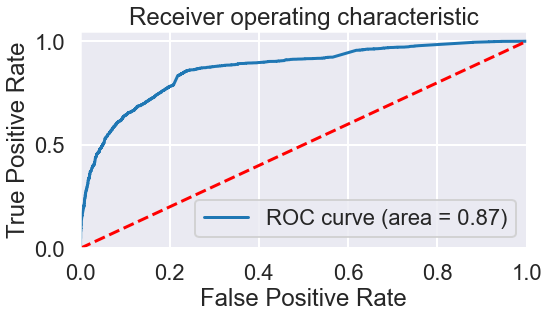

In [87]:
# Call for roc curve function for plotting

e_roc(Y_train_pred_final2.Converted, Y_train_pred_final2.Converted_probability)

IT can be concluded that model has great accuracy as curve is closer to the left side of the border than to the right side and area under the curve is 87% of the total area.

### Conclusion from RFE Test - 1 & Test - 2

For RFETest - 1, auc score is 0.88 in ROC curve plot.
For RFETest - 2, auc score is 0.87 in ROC curve plot.
As AUC measures how true postive rates and false positive rates trade-off. It indicates the model stability as the larger the area, the model will be able to distinguish classes. RFE model 1 is better.

## Prediction the test dataset

### Scaling the test dataset

In [88]:
x_test[['Total Time Spent on Website']]=scaler.transform(x_test[['Total Time Spent on Website']])

In [89]:
# Test

test_cols=x_train_4.columns[1:]              # Taking the same column train set has
x_test_final=x_test[test_cols]               # Updating it in the final test set
x_test_final=sm.add_constant(x_test_final)   # Adding constant to the final set set
Y_pred_test=reg4.predict(x_test_final)       # Predicting the final test set

In [90]:
# Creating a new dataset and saving the prediction values in it

Y_test_pred_final=pd.DataFrame({'Converted':Y_test.values,'Converted_Probability':Y_pred_test,'ID':Y_test.index})

Y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.650203,4269
2376,1,0.899467,2376
7766,1,0.735555,7766
9199,0,0.072559,9199
4359,1,0.672628,4359


### Model Evaluation


In [91]:
# Predict with probability cutoff as 0.4 by creating new columns in the final test dataset

Y_test_pred_final['Predicted']=Y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

Y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.650203,4269,1
2376,1,0.899467,2376,1
7766,1,0.735555,7766,1
9199,0,0.072559,9199,0
4359,1,0.672628,4359,1


In [92]:
print('Accuracy score in predicting test dataset :',metrics.accuracy_score(Y_test_pred_final.Converted, Y_test_pred_final.Predicted))   # Printing the score
print('Precision score in predicting test dataset:',precision_score(Y_test_pred_final.Converted, Y_test_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(Y_test_pred_final.Converted, Y_test_pred_final.Predicted))      # Printing the recall score

Accuracy score in predicting test dataset : 0.8152958152958153
Precision score in predicting test dataset: 0.7541412380122058
Recall score in predicting test dataset: 0.7899543378995434


### Lead Score assigning

In [93]:
# lead number and lead score creation column

Y_test_pred_final['Lead Number']=e_df1.iloc[Y_test_pred_final['ID'],1]

Y_test_pred_final['Lead Score']=Y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


Y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.650203,4269,1,619003,65
2376,1,0.899467,2376,1,636884,90
7766,1,0.735555,7766,1,590281,74
9199,0,0.072559,9199,0,579892,7
4359,1,0.672628,4359,1,617929,67


## Conclusion

#### Acceptable range of Accuracy, Precision and Recall score
#### Higher recall score than precision score
#### The model meets the company requirements and is a stable model